In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Combine the data into a single DataFrame
study_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
study_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [5]:
# Check the number of mice
mouse_count = study_data["Mouse ID"].nunique()
mouse_count

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = study_data[study_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
586,g989,0,45.000000,0,Propriva,Female,21,26
587,g989,0,45.000000,0,Propriva,Female,21,26
588,g989,5,48.786801,0,Propriva,Female,21,26
589,g989,5,47.570392,0,Propriva,Female,21,26
590,g989,10,51.745156,0,Propriva,Female,21,26
591,g989,10,49.880528,0,Propriva,Female,21,26
592,g989,15,51.325852,1,Propriva,Female,21,26
593,g989,15,53.442020,0,Propriva,Female,21,26
594,g989,20,55.326122,1,Propriva,Female,21,26
595,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
clean_data = study_data.drop_duplicates(subset = 'Mouse ID', keep='last')
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,a203,45,67.973419,2,Infubinol,Female,20,23
19,a251,45,65.525743,1,Infubinol,Female,21,25
29,a262,45,70.717621,4,Placebo,Female,17,29
39,a275,45,62.999356,3,Ceftamin,Female,20,28
46,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
1852,z435,10,48.710661,0,Propriva,Female,12,26
1862,z578,45,30.638696,0,Ramicane,Male,11,16
1872,z581,45,62.754451,3,Infubinol,Female,24,25
1882,z795,45,65.741070,3,Naftisol,Female,13,29


In [8]:
# Check the number of mice in the clean DataFrame
mouse_count = clean_data["Mouse ID"].nunique()
mouse_count

249

## Summary Statistics

In [9]:
# Show dataframe for reference
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,a203,45,67.973419,2,Infubinol,Female,20,23
19,a251,45,65.525743,1,Infubinol,Female,21,25
29,a262,45,70.717621,4,Placebo,Female,17,29
39,a275,45,62.999356,3,Ceftamin,Female,20,28
46,a366,30,63.440686,1,Stelasyn,Female,16,29


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Assemble the resulting series into a single summary DataFrame.

drug_reg = clean_data["Drug Regimen"].unique().tolist()
drug_reg

['Infubinol',
 'Placebo',
 'Ceftamin',
 'Stelasyn',
 'Zoniferol',
 'Ramicane',
 'Ketapril',
 'Propriva',
 'Naftisol',
 'Capomulin']

In [11]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

mean = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dev = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = std_dev/np.sqrt(std_dev).count()

drug_group = ({"Mean Tumor Volume": mean,
              "Median Tumor Volume": median,
              "Tumor Volume Variance": var,
              "Tumor Volume Std. Dev.": std_dev,
              "Tumor Volume Std. Err.": sem})
drug_group_df = pd.DataFrame(drug_group)
drug_group_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,0.571519
Ceftamin,57.753977,59.851956,69.982735,8.365568,0.836557
Infubinol,58.178246,60.165180,74.010875,8.602957,0.860296
Ketapril,62.806191,64.487812,98.921330,9.945920,0.994592
Naftisol,61.205757,63.283288,106.029927,10.297083,1.029708
Placebo,60.508414,62.030594,78.759797,8.874672,0.887467
Propriva,56.736964,55.841410,69.349002,8.327605,0.832760
Ramicane,36.191390,36.561652,32.166354,5.671539,0.567154
Stelasyn,61.001707,62.192350,90.331586,9.504293,0.950429


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
def sem(x):
    return x.std()/np.sqrt(x.count())

grouped_df = clean_data.groupby("Drug Regimen")
agg_df = grouped_df['Tumor Volume (mm3)'].agg(['mean', 'median', 'std', 'var', sem])

agg_df

,mean,median,std,var,sem
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,5.715188,32.663378,1.143038
Ceftamin,57.753977,59.851956,8.365568,69.982735,1.673114
Infubinol,58.178246,60.165180,8.602957,74.010875,1.720591
Ketapril,62.806191,64.487812,9.945920,98.921330,1.989184
Naftisol,61.205757,63.283288,10.297083,106.029927,2.059417
Placebo,60.508414,62.030594,8.874672,78.759797,1.774934
Propriva,56.736964,55.841410,8.327605,69.349002,1.665521
Ramicane,36.191390,36.561652,5.671539,32.166354,1.134308
Stelasyn,61.001707,62.192350,9.504293,90.331586,1.940056


In [13]:
# Show clean_data for reference
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,a203,45,67.973419,2,Infubinol,Female,20,23
19,a251,45,65.525743,1,Infubinol,Female,21,25
29,a262,45,70.717621,4,Placebo,Female,17,29
39,a275,45,62.999356,3,Ceftamin,Female,20,28
46,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
print(clean_data.dtypes)

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object


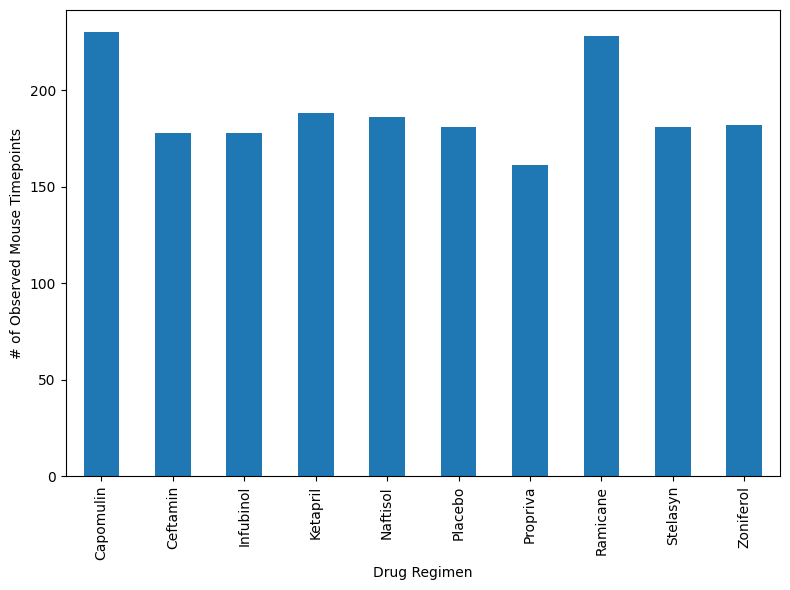

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_counts = study_data.groupby("Drug Regimen")

timepoints = mice_counts["Timepoint"].count()

timepoints_counts = timepoints.plot(kind='bar', figsize=(8, 6))
timepoints_counts.set_xlabel("Drug Regimen")
timepoints_counts.set_ylabel("# of Observed Mouse Timepoints")

plt.tight_layout()
plt.show()


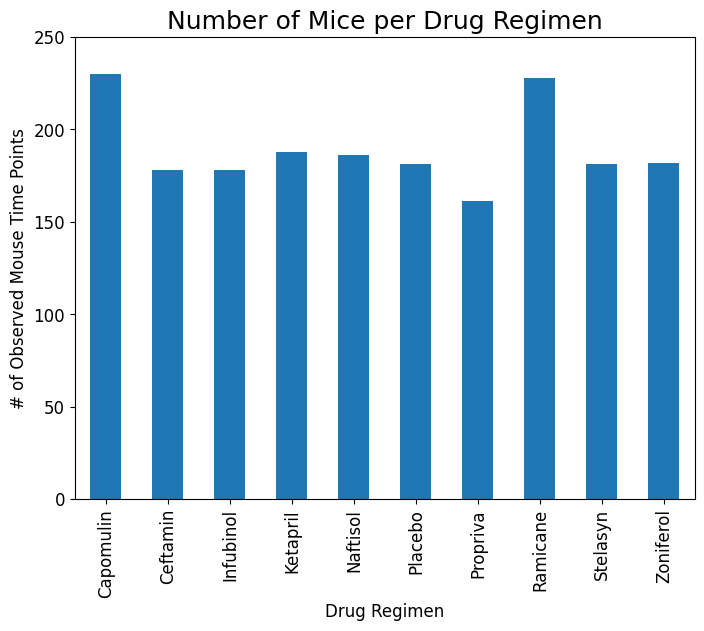

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mice_count = study_data["Drug Regimen"].value_counts().sort_index()

mice_count.plot(kind="bar", figsize=(8, 6))

plt.xlabel ("Drug Regimen", size = 12)
plt.ylabel ("# of Observed Mouse Time Points", size = 12)
plt.title("Number of Mice per Drug Regimen", size = 18)
plt.ylim(0, max(study_data["Drug Regimen"].value_counts() + 20))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

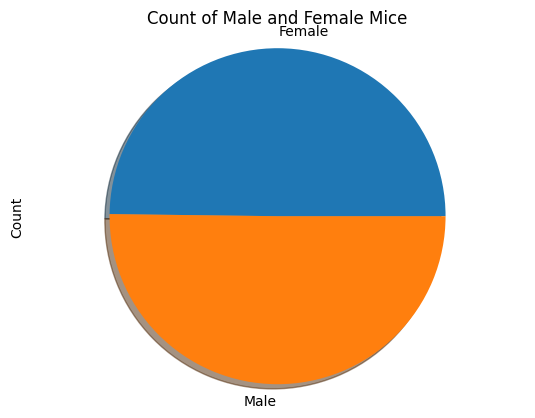

In [17]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
mice_sex = clean_data.groupby("Sex")

# Get the unique mice with their gender
mice_sex_count = mice_sex["Sex"].count()

# Make the pie chart
sex_distribution = mice_sex_count.plot(kind="pie", y="Sex", title=("Count of Male and Female Mice"), shadow=True)

sex_distribution.set_ylabel("Count")

plt.axis("equal")
plt.show()

                                       

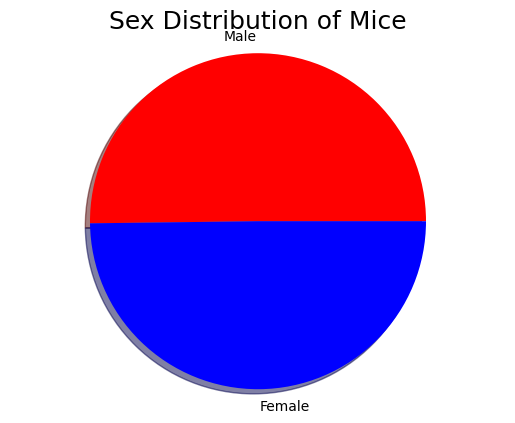

In [18]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
colors = ["red", "blue"]
labels = ["Male", "Female"]
mice_sex_count_2 = clean_data["Sex"].value_counts()
mice_sex_count_2
plt.pie(mice_sex_count_2, labels=labels, colors=colors, shadow=True)
# Get the unique mice with their gender
plt.axis("equal")
plt.title("Sex Distribution of Mice", size = 18)
plt.show()

# Make the pie chart

## Quartiles, Outliers and Boxplots

In [19]:
print(study_data.dtypes)

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object


In [20]:
study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_drugs = study_data[study_data["Drug Regimen"].isin(drugs)]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = filtered_drugs[["Mouse ID", "Timepoint"]]
max_timepoint_group = max_timepoint.groupby("Mouse ID").max("Timepoint")
max_timepoint_group

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_last = pd.merge(max_timepoint_group, filtered_drugs, how="left", on=["Mouse ID", "Timepoint"])
tumor_volume_last


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [22]:
print(tumor_volume_last.dtypes)

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object


In [23]:
# Put treatments into a list for for loop (and later for plot labels) see above variable 'drugs'

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = {}
outliers = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers.
#quartiles = tumor_volume_last["Tumor Volume (mm3)"].quantile([.25, .5, .75])
#q1 = quartiles[0.25]
#q3 = quartiles[0.75]
#iqr = q3 - q1

# Changed the recommended 1.5 multiplier to 1.1 because 1.5 as a multiplier was eliminating ALL outliers from my dataset. 
#lower_bound = q1 - (1.5 * iqr)
#upper_bound = q3 + (1.5 * iqr)

    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drugs:
    outliers[drug] = []
    drug_rows = tumor_volume_last[tumor_volume_last["Drug Regimen"] == drug]

    quartiles = drug_rows["Tumor Volume (mm3)"].quantile([.25, .5, .75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3 - q1

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    print(q1, q3, upper_bound, lower_bound)
    
    # add subset
    tumor_vol[drug] = drug_rows["Tumor Volume (mm3)"].tolist()

    # Determine outliers using upper and lower bounds
    #outliers = tumor_vol[drug] < lower_bound | tumor_vol[drug] > upper_bound
    for vol in tumor_vol[drug]:
        if (vol > upper_bound) or (vol < lower_bound):
            outliers[drug].append(vol)

32.37735684 40.1592203 51.83201549 20.70456164999999
31.56046955 40.65900627 54.30681135 17.912664470000003
54.04860769 65.52574285 82.74144559000001 36.83290494999999
48.72207785 64.29983003 87.66645829999999 25.355449580000002


In [24]:
outliers_series = pd.Series(outliers)

In [25]:
for name, outlier in outliers_series.items():
    print(f"The potential outliers of {name} are {outlier}")

The potential outliers of Capomulin are []
The potential outliers of Ramicane are []
The potential outliers of Infubinol are [36.3213458]
The potential outliers of Ceftamin are []


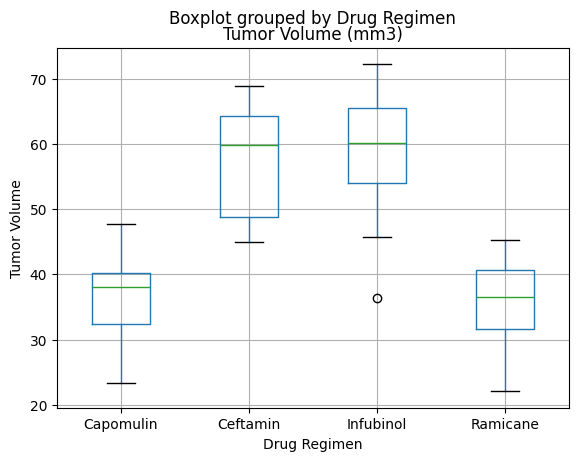

In [26]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
tumor_volume_last.boxplot(column="Tumor Volume (mm3)", by="Drug Regimen")
plt.ylabel("Tumor Volume")
plt.xlabel("Drug Regimen")
plt.show()


## Line and Scatter Plots

In [27]:
tumor_volume_last

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [28]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse = study_data[study_data["Mouse ID"] == "i557"]
mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
651,i557,0,45.000000,0,Capomulin,Female,1,24
652,i557,5,42.261665,0,Capomulin,Female,1,24
653,i557,10,42.992077,0,Capomulin,Female,1,24
654,i557,15,43.529876,0,Capomulin,Female,1,24
655,i557,20,43.967895,0,Capomulin,Female,1,24
656,i557,25,44.596219,0,Capomulin,Female,1,24
657,i557,30,45.261384,0,Capomulin,Female,1,24
658,i557,35,45.941949,0,Capomulin,Female,1,24
659,i557,40,46.821070,1,Capomulin,Female,1,24
660,i557,45,47.685963,1,Capomulin,Female,1,24


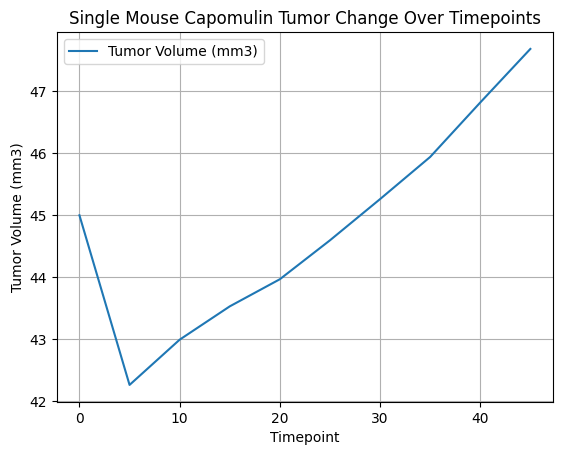

In [29]:
mouse.plot(x="Timepoint", y="Tumor Volume (mm3)", kind="line")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Single Mouse Capomulin Tumor Change Over Timepoints")
plt.grid(True)
plt.show()

In [30]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = study_data[study_data["Drug Regimen"] == "Capomulin"]
capomulin

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
174,b128,0,45.000000,0,Capomulin,Female,9,22
175,b128,5,45.651331,0,Capomulin,Female,9,22
176,b128,10,43.270852,0,Capomulin,Female,9,22
177,b128,15,43.784893,0,Capomulin,Female,9,22
178,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1831,y793,25,38.992734,2,Capomulin,Male,17,17
1832,y793,30,35.726023,2,Capomulin,Male,17,17
1833,y793,35,36.327870,2,Capomulin,Male,17,17
1834,y793,40,31.475411,2,Capomulin,Male,17,17


In [31]:
avg_tum_vol = capomulin.groupby("Mouse ID").mean("Tumor Volume (mm3)")

avg_tum_vol

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0


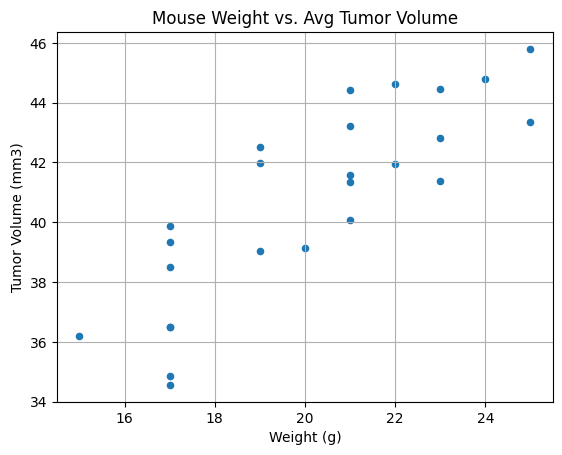

In [32]:
avg_tum_vol.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, title="Mouse Weight vs. Avg Tumor Volume")
plt.show()

## Correlation and Regression

In [33]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

weight = avg_tum_vol.iloc[:,4]
avg_tumor_vol = avg_tum_vol.iloc[:,1]
correlation = st.pearsonr(weight, avg_tumor_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


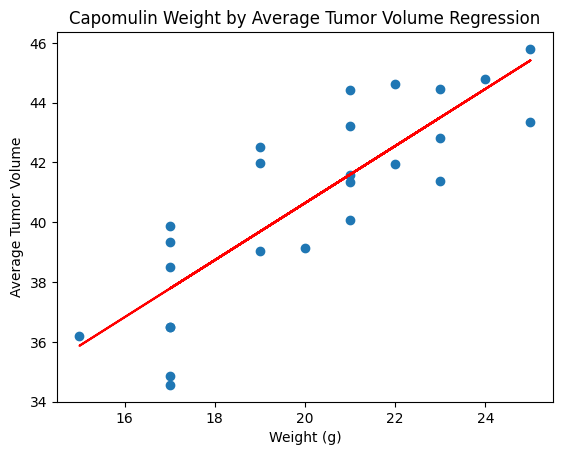

In [34]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, avg_tumor_vol)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, avg_tumor_vol)
plt.plot(weight, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.title("Capomulin Weight by Average Tumor Volume Regression")
plt.show()